In [1]:
import numpy as np
working_dir: str = './working_dir'
super_ivim_dc_filename: str = 'super_ivim_dc'  # do not include .pt
ivimnet_filename: str = 'ivimnet'  # do not include .pt

bvalues = np.array([0,15,30,45,60,75,90,105,120,135,150,175,200,400,600,800])
snr = 10
sample_size = 100

## Simulate

Run training, generate .pt files

In [2]:
# from super_ivim_dc.train import train

# train(
#     SNR=snr, 
#     bvalues=bvalues, 
#     super_ivim_dc=True,
#     ivimnet=True,
#     work_dir=working_dir,
#     super_ivim_dc_filename=super_ivim_dc_filename,
#     ivimnet_filename=ivimnet_filename,
#     verbose=False
# )

Files that will be created:

- **super_ivim_dc_init.json** - contains the initial values used in the training
- **super_ivim_dc_init_NRMSE.csv** - ???
- **super_ivim_dc_init.pt** - the pytorch model

## Test

Generate a simulated signal + ...

simulative model 
 [10] SNR 
 1000000 samples 
 rician noise is set to True 
 bvalues are: [  0  15  30  45  60  75  90 105 120 135 150 175 200 400 600 800]
hyperparams class is sim
The number of samples are: 100


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 421.76it/s]


The number of samples are: 100


100%|██████████| 100/100 [00:00<00:00, 459.55it/s]


(100,)


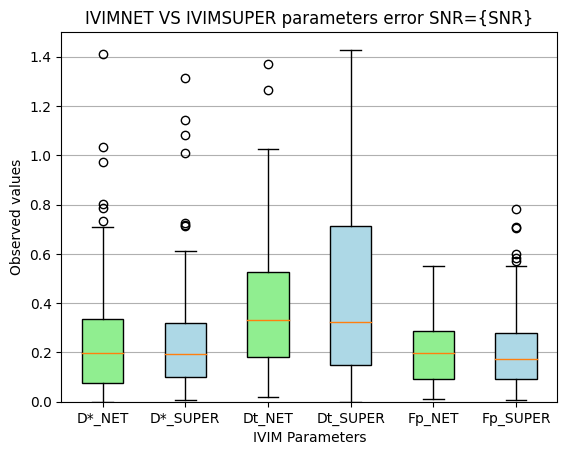

In [13]:
from super_ivim_dc.infer import test_infer

test_infer(
    SNR=snr,
    bvalues=bvalues,
    work_dir=working_dir,
    super_ivim_dc_filename=super_ivim_dc_filename,
    ivimnet_filename=ivimnet_filename,
    save_figure_to=None,  # if set to None, the figure will be shown in the notebook
    sample_size=sample_size,
)

## Generate simulated signal

In [9]:
from super_ivim_dc.IVIMNET import simulations

IVIM_signal_noisy, Dt, f, Dp = simulations.sim_signal(
    SNR=snr, 
    bvalues=bvalues, 
    sims=sample_size
)

# labels = np.stack((Dt, f, Dp), axis=1).squeeze()  
Dt, f, Dp = np.squeeze(Dt), np.squeeze(f), np.squeeze(Dp)

Run inference on the simulated signal

In [5]:
from super_ivim_dc.infer import infer_from_signal

Dp_ivimnet, Dt_ivimnet, Fp_ivimnet, S0_ivimnet = infer_from_signal(
    signal=IVIM_signal_noisy, 
    bvalues=bvalues,
    model_path=f"{working_dir}/{ivimnet_filename}.pt",
)

Dp_superivimdc, Dt_superivimdc, Fp_superivimdc, S0_superivimdc = infer_from_signal(
    signal=IVIM_signal_noisy, 
    bvalues=bvalues,
    model_path=f"{working_dir}/{super_ivim_dc_filename}.pt",
)

simulative model 
 [10] SNR 
 1000000 samples 
 rician noise is set to True 
 bvalues are: [  0  15  30  45  60  75  90 105 120 135 150 175 200 400 600 800]
hyperparams class is sim
The number of samples are: 100


 48%|████▊     | 48/100 [00:00<00:00, 474.43it/s]

100%|██████████| 100/100 [00:00<00:00, 473.07it/s]


simulative model 
 [10] SNR 
 1000000 samples 
 rician noise is set to True 
 bvalues are: [  0  15  30  45  60  75  90 105 120 135 150 175 200 400 600 800]
hyperparams class is sim
The number of samples are: 100


100%|██████████| 100/100 [00:00<00:00, 471.05it/s]


Compare inference output with simulated signal labels

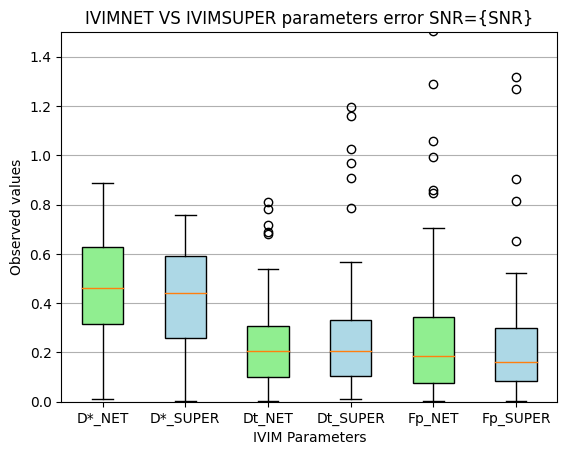

(100, 6)


In [12]:
DpNET_error = np.sqrt(np.square(Dp-Dp_ivimnet))/Dp
DtNET_error = np.sqrt(np.square(Dt-Dt_ivimnet))/Dt
FpNET_error = np.sqrt(np.square(f-Fp_ivimnet))/f

DpSUPER_error = np.sqrt(np.square(Dp-Dp_superivimdc))/Dp
DtSUPER_error = np.sqrt(np.square(Dt-Dt_superivimdc))/Dt
FpSUPER_error = np.sqrt(np.square(f-Fp_superivimdc))/f

errors_np_array = np.stack([
    DpNET_error,  
    DpSUPER_error, 
    DtNET_error, 
    DtSUPER_error,
    FpNET_error,
    FpSUPER_error,
], axis=1)
bp_title = "IVIMNET VS IVIMSUPER parameters error SNR={SNR}"

from super_ivim_dc.IVIMNET import deep
deep.boxplot_ivim(errors_np_array, bp_title)